## Multi-Class Prediction of Obesity Risk

In [221]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [222]:
df_train = pd.read_csv(r'datasets/train.csv')
df_test = pd.read_csv(r'datasets/test.csv')

### 1. Data analysis

In [223]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


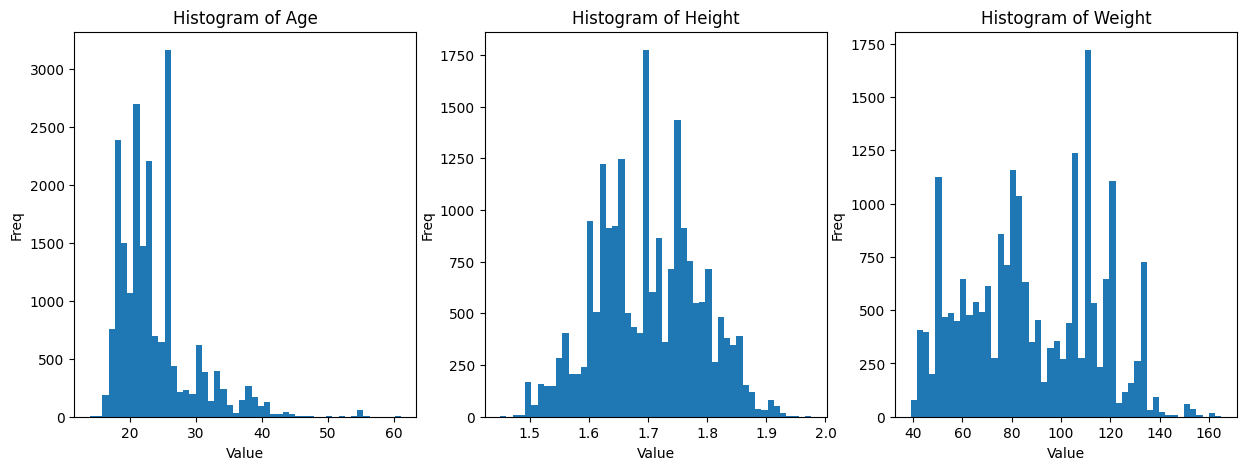

In [224]:
# Histogram for Age
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(df_train['Age'], bins=50)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Freq')
axes[0].set_title('Histogram of Age')

# Histogram for Height
axes[1].hist(df_train['Height'], bins=50)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Freq')
axes[1].set_title('Histogram of Height')

# Histogram for Weight
axes[2].hist(df_train['Weight'], bins=50)
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Freq')
axes[2].set_title('Histogram of Weight')

plt.show()

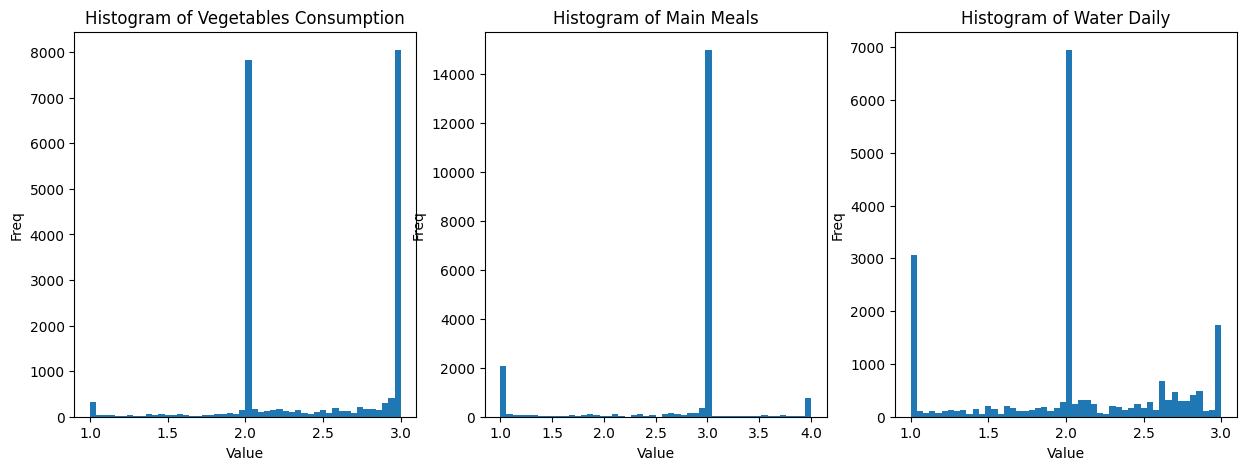

In [225]:
# Histogram for FCVC (vegetables)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(df_train['FCVC'], bins=50)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Freq')
axes[0].set_title('Histogram of Vegetables Consumption')

# Histogram for NCP (main meals)
axes[1].hist(df_train['NCP'], bins=50)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Freq')
axes[1].set_title('Histogram of Main Meals')

# Histogram for CH2O (daily water)
axes[2].hist(df_train['CH2O'], bins=50)
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Freq')
axes[2].set_title('Histogram of Water Daily')

plt.show()

### 2. Data preprocessing

In [226]:
# Check NaN and duplicates
miss = df_train.isna().sum().sum()
dupli = df_train.duplicated().sum()
print(f'Missing values: {miss}\t Duplicated rows: {dupli}')

Missing values: 0	 Duplicated rows: 0


Biometrics

In [227]:
# Convert gender to binary values
df_train['Gender'] = df_train['Gender'].map({'Female': 0, 'Male': 1})
df_test['Gender'] = df_test['Gender'].map({'Female': 0, 'Male': 1})

# Round age
df_train['Age'] = df_train['Age'].round()
df_test['Age'] = df_test['Age'].round()

# Round height and weight
df_train[['Height', 'Weight']] = df_train[['Height', 'Weight']].round(2)
df_test[['Height', 'Weight']] = df_test[['Height', 'Weight']].round(2)

# Calculate IMC (kg/m^2) and round
df_train['IMC'] = (df_train['Weight'] / (df_train['Height']**2)).round(2)
df_test['IMC'] = (df_test['Weight'] / (df_test['Height']**2)).round(2)


Family history & eating habits

In [228]:
# Convert family history to binary
df_train['family_history_with_overweight'] = df_train['family_history_with_overweight'].map({'no': 0, 'yes': 1})
df_test['family_history_with_overweight'] = df_test['family_history_with_overweight'].map({'no': 0, 'yes': 1})

# FAVC (consumption of high caloric food)
df_train['FAVC'] = df_train['FAVC'].map({'no': 0, 'yes': 1})
df_test['FAVC'] = df_test['FAVC'].map({'no': 0, 'yes': 1})

# FCVC (consumption of vegetables)
df_train['FCVC'] = df_train['FCVC'].round(2)
df_test['FCVC'] = df_test['FCVC'].round(2)

# NCP (number of main meals)
df_train['NCP'] = df_train['NCP'].round(2)
df_test['NCP'] = df_test['NCP'].round(2)

# Encode CAEC (food between meals) ordinally
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # Sets unseen values as -1

df_train['CAEC'] = ord_encoder.fit_transform(df_train[['CAEC']])
df_test['CAEC'] = ord_encoder.transform(df_test[['CAEC']])

Daily-life habits

In [229]:
# Smoke to binary
df_train['SMOKE'] = df_train['SMOKE'].map({'no': 0, 'yes': 1})
df_test['SMOKE'] = df_test['SMOKE'].map({'no': 0, 'yes': 1})

# Round CH20 (water daily)
df_train['CH2O'] = df_train['CH2O'].round(2)
df_test['CH2O'] = df_test['CH2O'].round(2)

# SCC (monitoring of calories) to binary
df_train['SCC'] = df_train['SCC'].map({'no': 0, 'yes': 1})
df_test['SCC'] = df_test['SCC'].map({'no': 0, 'yes': 1})

# FAF (physical activity)
df_train['FAF'] = df_train['FAF'].round(2)
df_test['FAF'] = df_test['FAF'].round(2)

# TUE (time using tech devices)
df_train['TUE'] = df_train['TUE'].round(2)
df_test['TUE'] = df_test['TUE'].round(2)

# Encode CALC (consumption of alcohol)
df_train['CALC'] = ord_encoder.fit_transform(df_train[['CALC']])
df_test['CALC'] = ord_encoder.transform(df_test[['CALC']])

# Encode MTRANS (transportation used)
oh_encoder = OneHotEncoder(drop='first', sparse_output=False)
oh_train = oh_encoder.fit_transform(df_train[['MTRANS']])
oh_test = oh_encoder.transform(df_test[['MTRANS']])

df_encoded_train = pd.DataFrame(oh_train, columns=oh_encoder.get_feature_names_out(input_features=['MTRANS']))
df_encoded_test = pd.DataFrame(oh_test, columns=oh_encoder.get_feature_names_out(input_features=['MTRANS']))

df_train = pd.concat([df_train, df_encoded_train], axis=1)
df_test = pd.concat([df_test, df_encoded_test], axis=1)
df_train.drop(columns=['MTRANS'], inplace=True)
df_test.drop(columns=['MTRANS'], inplace=True)

Target

In [230]:
obesity_encoder = OrdinalEncoder(categories=[
    ['Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III']
    ])

target_encoded = obesity_encoder.fit_transform(df_train[['NObeyesdad']])
df_train['NObeyesdad'] = target_encoded.astype(int)

### 3. Training and validation

In [231]:
# Scale numerical columns (not bool nor encoded)
scaler = MinMaxScaler()
to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMC']

df_train[to_scale] = scaler.fit_transform(df_train[to_scale])
df_test[to_scale] = scaler.transform(df_test[to_scale])

In [232]:
# Separate features and target
X = df_train.drop(columns=['id', 'NObeyesdad'])
y = df_train.NObeyesdad

# Split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=11)

# Check arrays' sizes
print('Training:')
print(f'Size of features: {X_train.shape}\t Size of target: {y_train.shape}')
print()
print('Validation:')
print(f'Size of features: {X_valid.shape}\t Size of target: {y_valid.shape}')

Training:
Size of features: (14530, 20)	 Size of target: (14530,)

Validation:
Size of features: (6228, 20)	 Size of target: (6228,)


### 4. Build the models and compare

In [233]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=25, max_leaf_nodes=None, random_state=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_valid)

rfc_acc = accuracy_score(y_valid, rfc_pred)
print(f'Random Forest accuracy: {rfc_acc*100:.2f}%')

Random Forest accuracy: 89.82%


In [234]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(max_iter=100, random_state=11)
hgbc.fit(X_train, y_train)
hgbc_pred = hgbc.predict(X_valid)

hgbc_acc = accuracy_score(y_valid, hgbc_pred)
print(f'HGradient Booster accuracy: {hgbc_acc*100:.2f}%')

HGradient Booster accuracy: 89.87%


In [235]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=12)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_valid)

ada_acc = accuracy_score(y_valid, ada_pred)
print(f'Ada Booster accuracy: {ada_acc*100:.2f}%')

Ada Booster accuracy: 70.49%


### 5. Predictions and submission

In [236]:
df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,IMC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,1,0.276596,0.754717,0.647628,1,1,0.970,0.666667,2.0,...,0.915,0,0.286667,0.000,1.0,0.529328,0.0,0.0,1.0,0.0
1,20759,0,0.148936,0.283019,0.214184,1,1,0.500,0.000000,2.0,...,1.000,0,0.333333,0.000,1.0,0.305345,0.0,0.0,1.0,0.0
2,20760,0,0.255319,0.358491,0.575916,1,1,1.000,0.666667,2.0,...,0.810,0,0.000000,0.125,1.0,0.676916,0.0,0.0,1.0,0.0
3,20761,1,0.148936,0.188679,0.513010,1,1,0.500,0.660000,2.0,...,0.895,0,0.030000,0.000,1.0,0.716178,0.0,0.0,1.0,0.0
4,20762,0,0.255319,0.339623,0.522291,1,1,1.000,0.666667,2.0,...,0.825,0,0.000000,0.370,1.0,0.628903,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,0.191489,0.509434,0.309614,1,0,0.905,0.666667,2.0,...,0.000,0,0.270000,0.390,1.0,0.319536,0.0,0.0,1.0,0.0
13836,34594,0,0.319149,0.264151,0.182453,0,1,1.000,0.666667,2.0,...,0.500,0,0.000000,0.000,1.0,0.275544,0.0,0.0,1.0,0.0
13837,34595,0,0.191489,0.264151,0.042678,0,1,1.000,0.423333,1.0,...,0.500,0,0.650000,0.500,1.0,0.110691,0.0,0.0,1.0,0.0
13838,34596,1,0.148936,0.320755,0.111058,1,1,0.500,0.666667,2.0,...,0.500,0,1.000000,1.000,2.0,0.173368,0.0,0.0,1.0,0.0


In [237]:
# Process test data
X_test = df_test.drop(columns=['id'])

# Predict and convert into labels again
preds = hgbc.predict(X_test)
labels = obesity_encoder.inverse_transform(preds.reshape(-1, 1))

# Create DF for submission
submission = pd.DataFrame({
    'id': df_test['id'],
    'NObeyesdad': labels.flatten() # Convert into 1D
})

In [238]:
# Create CSV file if it doesn't exist yet
if not os.path.exists('obesity1_sub.csv'):
    submission.to_csv('obesity1_sub.csv', index=False)
else:
    print('Submission already created')